<a href="https://colab.research.google.com/github/ialara/or-student/blob/main/lectures/Dewar_Sim_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def attrition(friendly, enemy, factor): 
    return max(0,friendly - factor*enemy)

def reinforcements(period, forces, reinf, force_ratio, blocks, thresholds):
    activated = [0, 0] #reinforcements called up
    for iside, side in enumerate(sides):
        reinforce_details = ' '
        neg_red = 2*iside-1
        if blocks[iside][0] > 0 and np.sum(reinf[iside][max(0,period-blocks[iside][2]):period]) == 0:
            if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
                reinforce_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
            if forces[iside][period] <= thresholds[iside][1]:
                reinforce_details = reinforce_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if reinforce_details != ' ':
            #print(side+' reinforces at', period, reinforce_details)
            blocks[iside][0] -= 1
            activated[iside] = blocks[iside][1]
    return blocks, activated

def withdrawn(period, forces, force_ratio, thresholds):
    withdraw = [False, '']
    for iside, side in enumerate(sides):
        withdraw_details = ' '
        neg_red = 2*iside-1 
        if force_ratio*neg_red >= thresholds[iside][0]*neg_red:
            withdraw_details = 'Force Ratio: {0:5.3f} {1:4.1f} '.format(force_ratio, thresholds[iside][0])
        if forces[iside][period] <= thresholds[iside][1]:
            withdraw_details = withdraw_details + 'Engaged: {0:5.3f} {1:4.1f}'.format(forces[iside][period], thresholds[iside][1])
        if withdraw_details != ' ':
            if withdraw[0]: withdraw[1] += ' & '
            withdraw[0] = True
            withdraw[1] += side
            #print(side+' withdraws at', period, withdraw_details)
    return withdraw

In [5]:
def Dewar_Sim(init_red, init_blue):
    red = []
    red = np.append(red, init_red)
    red_reinf = []

    blue = []
    blue = np.append(blue, init_blue)
    blue_reinf = []

    blocks = [[5, 300, 70], [5, 300, 70]]
    reinforce_thresholds = [[2.5, 0.8*red[0]],[4.0, 0.8*blue[0]]]
    withdraw_thresholds = [[1.5, 0.7*red[0]],[10.0, 0.7*blue[0]]]

    period = 0
    FR = red[0]/blue[0]
    withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)
    while not(withdraw[0]):
        #Reinforcements
        blocks, activated = reinforcements(period, (red, blue), (red_reinf, blue_reinf), FR, blocks, reinforce_thresholds)
        red_reinf = np.append(red_reinf, activated[0])
        blue_reinf = np.append(blue_reinf, activated[1])
        #Add prior reinforcements, if any
        if period >=70:
            blue[period] += blue_reinf[period-70]
            red[period] += red_reinf[period-70]
        #Atrrition calculation
        blue = np.append(blue, attrition(blue[period], red[period], 1/2048))
        red = np.append(red, attrition(red[period], blue[period], 1/512))

        period += 1
        FR = red[period]/blue[period]
        withdraw = withdrawn(period, (red, blue), FR, withdraw_thresholds)

    return withdraw[1]

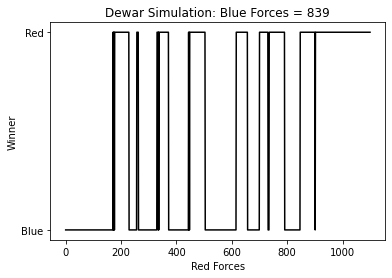

In [6]:
winner = []
sides = ['red', 'blue']
#Figure 1
#for red in range(1500,3500,10):
#    winner = np.append(winner, Dewar_Sim(red, 839)=='blue')
#Figure 2
for red in range(700,1800,1):
    winner = np.append(winner, Dewar_Sim(red, 500)=='blue')

red_forces = np.arange(1500, 3500, 10)
plt.plot(winner, c='k')
plt.title("Dewar Simulation: Blue Forces = 839")
plt.xlabel("Red Forces")
plt.ylabel("Winner")
plt.yticks((0.0, 1.0), ('Blue', 'Red'))
plt.show()